In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X:  (100, 2)
dimension de Y:  (100, 1)


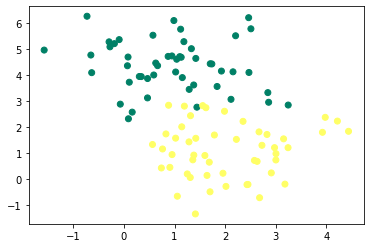

In [3]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
Y = Y.reshape((Y.shape[0], 1))
print('dimension de X: ', X.shape)
print('dimension de Y: ', Y.shape)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer')
plt.show()

In [4]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [6]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [8]:
def log_loss(A, Y):
    m = len(Y)
    norm = 1/m
    somme = np.sum(-Y * np.log(A) - (1 - Y) * np.log(1-A))
    return norm * somme

In [10]:
def gradients(A, X, Y):
    m = len(Y)
    dW = 1/m * np.dot(X.T, A - Y)
    db = 1/m * np.sum(A - Y)
    return (dW, db)

In [12]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [35]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [30]:
def artificial_neuron(X, Y, learning_rate, n_iteration):
    # initialiser W et b
    W, b = initialisation(X)
    Loss = []
    # boucle d'apprentissage
    for i in range(n_iteration):
        A = model(X, W, b)
        Loss.append(log_loss(A, Y))
        dW, db = gradients(A, X, Y)
        W, b = update(dW, db, W, b, learning_rate)
    y_pred = predict(X, W, b)
    print(accuracy_score(Y, y_pred))
    plt.plot(Loss)
    plt.show()
    
    return (W, b)
        

0.92


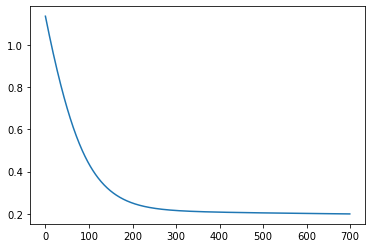

In [32]:
W , b = artificial_neuron(X, Y, 0.01, 700)

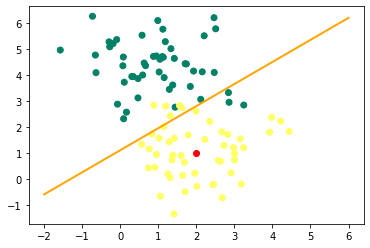

[0.90352927]


array([ True])

In [39]:
new_plant = np.array([2,1])
x0 = np.linspace(-2, 6, 100)
x1 = (-W[0] * x0 - b) / W[1]
plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c = 'orange', lw = 2)
plt.show()
predict(new_plant, W, b)